<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [26]:
plt.rcParams['figure.figsize'] = [15, 5]
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [27]:
series = data['value']

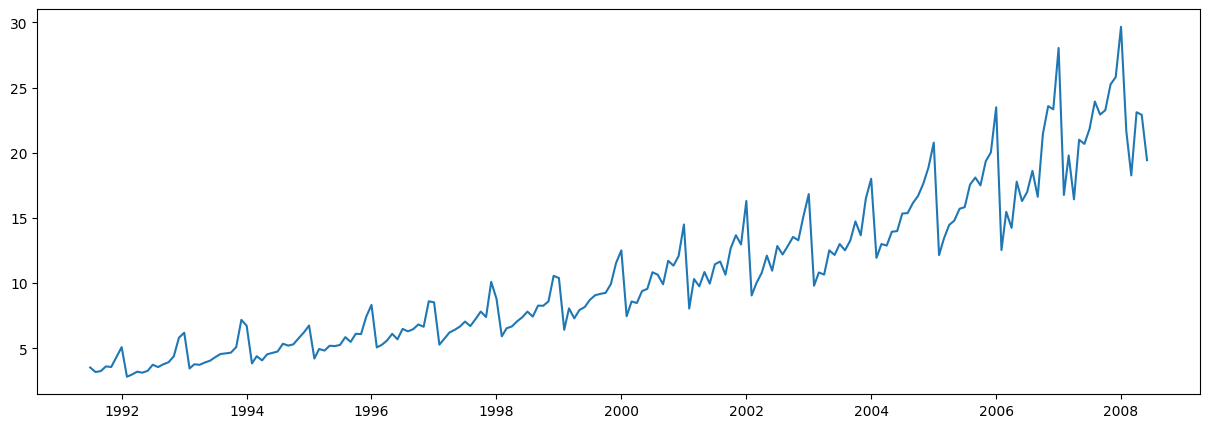

In [28]:
plt.plot(series)

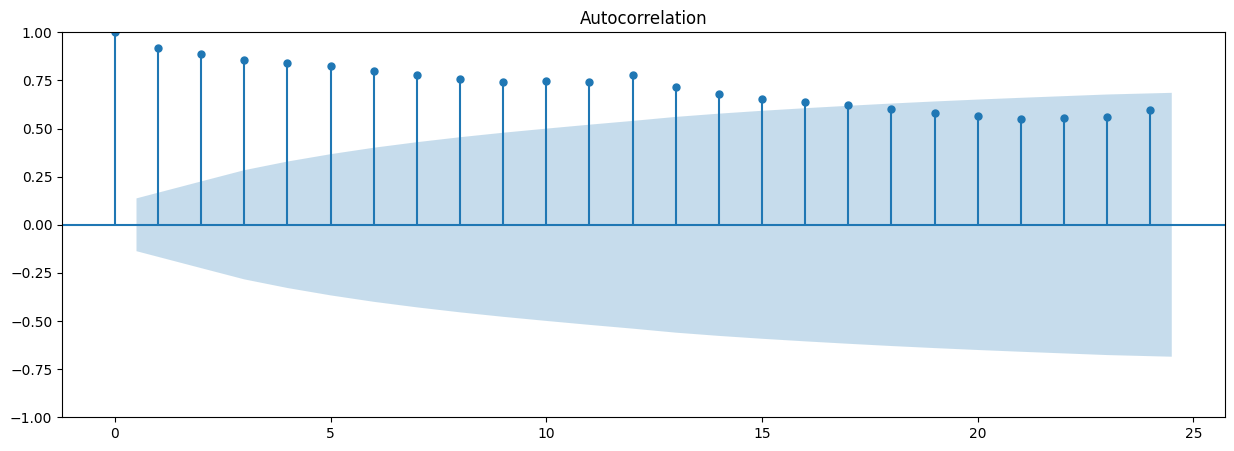

In [29]:
import statsmodels.graphics.tsaplots as sgt

_ = sgt.plot_acf(series)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

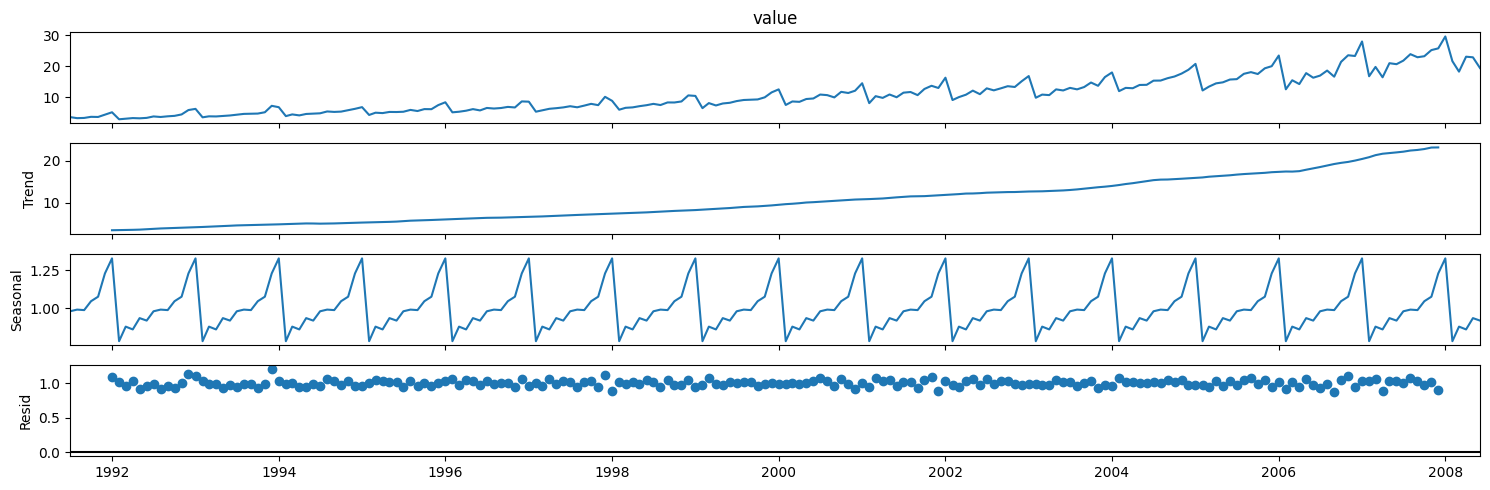

In [31]:
seasonal_decompose_result = seasonal_decompose(series, model='multiplicative')
_ = seasonal_decompose_result.plot()

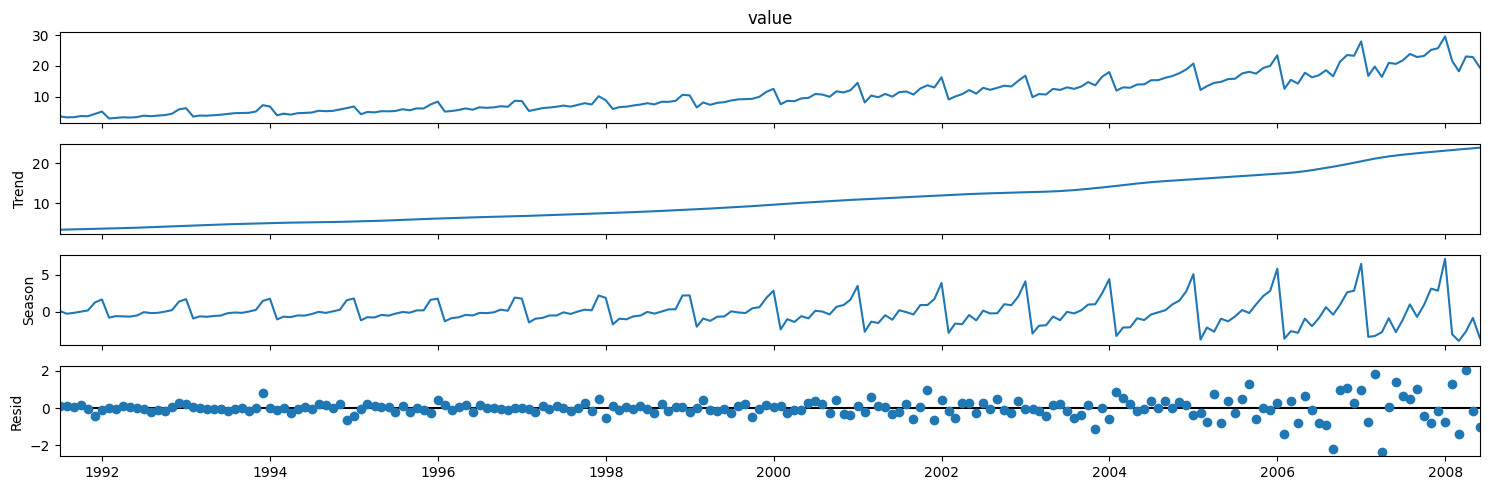

In [32]:
_ = STL(series, period=12).fit().plot()

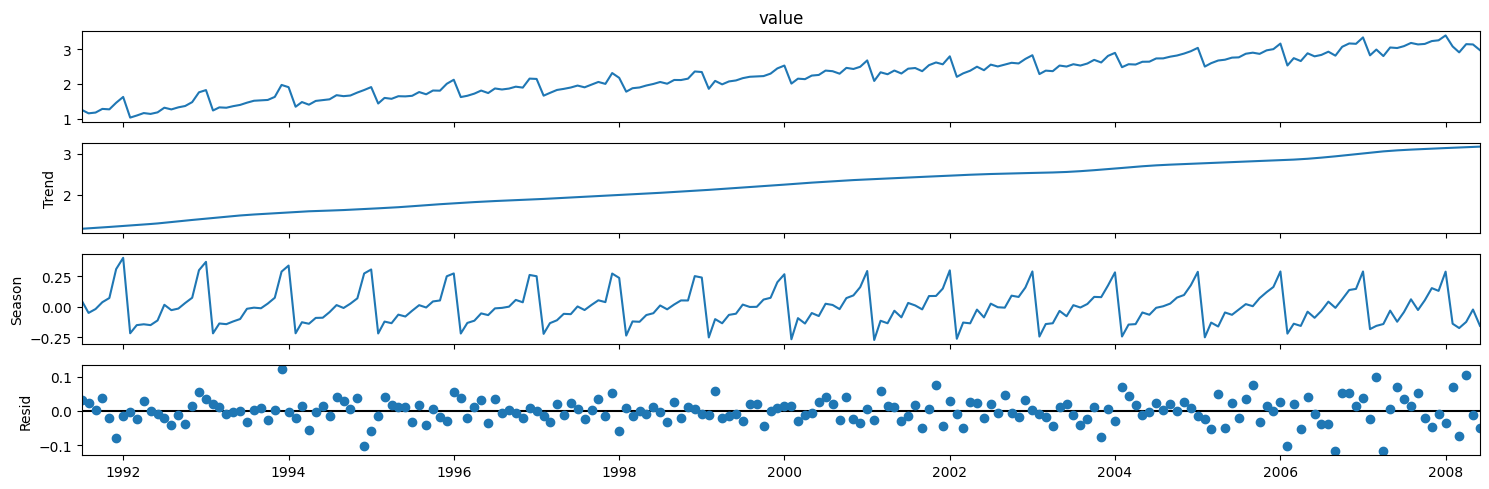

In [33]:
stl_decompose_result = STL(np.log(series), period=12).fit()
_ = stl_decompose_result.plot()

In [34]:
seasonal_decompose_result.resid.mean(), np.exp(stl_decompose_result.resid).mean()

(np.float64(0.9994453786453805), np.float64(1.0008197641668466))

/tmp/ipython-input-559166204.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipython-input-559166204.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




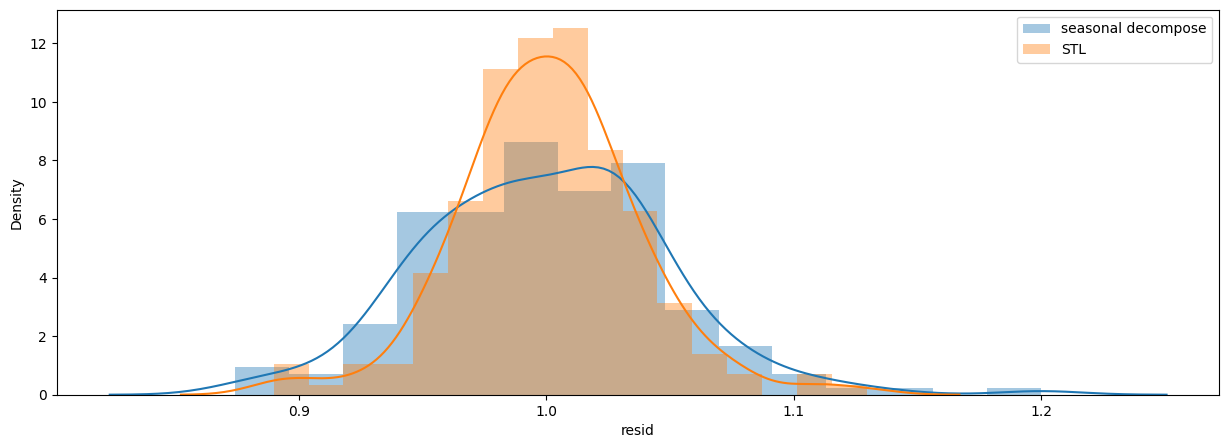

In [35]:
sns.distplot(seasonal_decompose_result.resid, label='seasonal decompose')
sns.distplot(np.exp(stl_decompose_result.resid), label='STL')
plt.legend()
plt.show()

In [36]:
train_data = series[series.index < '2007-01-01']
test_data = series[series.index >= '2007-01-01']

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data.values, mode='lines', name='train'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data.values, mode='lines', name='test'))
fig.show()

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.6, optimized=False)
fit3 = SimpleExpSmoothing(train_data, initialization_method='estimated').fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [43]:
fcast = [model.predict(start=test_data.index.min(), end=test_data.index.max()) for model in [fit1, fit2, fit3]]